In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.transforms as mtransforms


In [12]:
# load  dataset
dataset = pd.read_csv('/home/francovm/Projects/SSE/data/processed/MAHI.csv', sep='\t', encoding='utf-8')
# dataset = dataset.drop(dataset.columns[[1, 3, 5]], axis=1) 
dataset.columns = ['x','n','u','y']


# Shift

In [13]:
shift_by = -1
vector = dataset['y'].copy()
df = dataset.copy()

In [14]:

tmp = vector.shift(shift_by)
tmp = tmp.fillna(0)
labelcol = 'y'  

# Add vector to the df

df[labelcol+'tmp'] = tmp.values

# Remove the rows with labelcol == 1.
df = df.drop(df[df[labelcol] == 1.].index)

# Drop labelcol and rename the tmp col as labelcol
df = df.drop(labelcol, axis=1)
df = df.rename(columns={labelcol+'tmp': labelcol})

# Make the labelcol binary
df.loc[df[labelcol] > 0., labelcol] = 1.
df = df.reset_index(drop=True)


In [15]:
idx = df.index.get_indexer_for(df[df.y == 1.].index)

for i in idx: 
    df.loc[i - 40: i ]['y']=1.
    
#     print(df.loc[i - 20: i ])
    


/home/francovm/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Plot 

It does not show the true values of 'Events'

[]

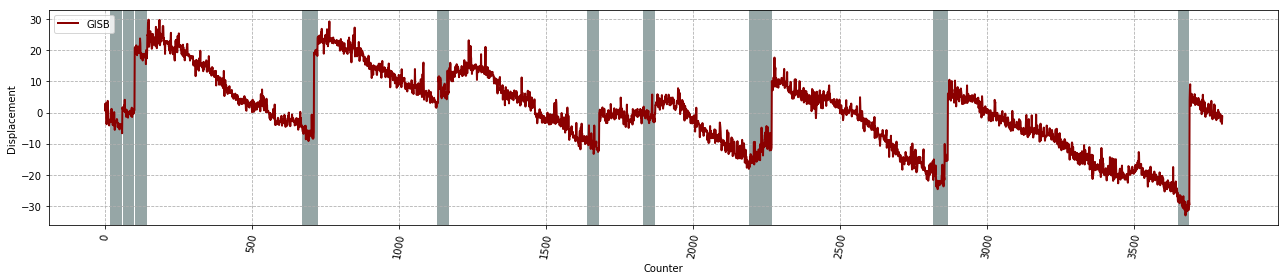

In [18]:
fig, ax = plt.subplots()

plt.plot(df['x'],'-', color='darkred',label="GISB",linewidth=2)

plt.legend(loc=2)
plt.xticks( rotation= 80 )

    # Grids
plt.gca().xaxis.grid(True, linestyle='--')
plt.gca().yaxis.grid(True, linestyle='--')

plt.xlabel('Counter')
plt.ylabel('Displacement')
# if (dataset_test['Events'] == 0.5): plt.axhline()
    
    # Get current size
fig_size = plt.rcParams["figure.figsize"]

    # Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size



trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.5
ax.fill_between(range(len(df['y'])), min(df['y']), max(df['y']), where=(df['y'] > 0.), 
                facecolor='darkslategray',
                alpha=0.5, transform=trans) 

# plt.show()

plt.tight_layout()
plt.plot()

In [7]:
# print(df.to_string())


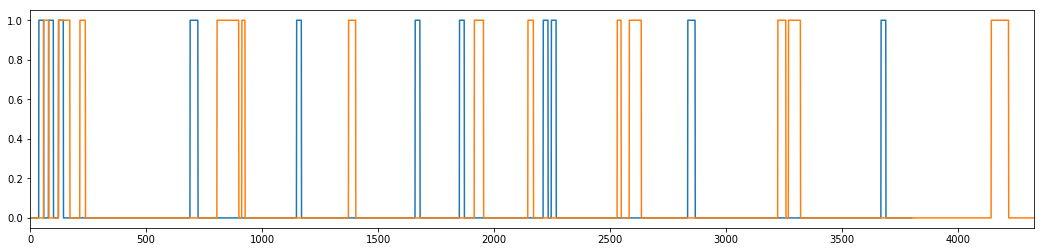

In [8]:
ax = df['y'].plot()
dataset['y'].plot(ax=ax)


In [9]:
# df.to_csv('input_data_shift.csv', sep='\t', encoding='utf-8',index=False)

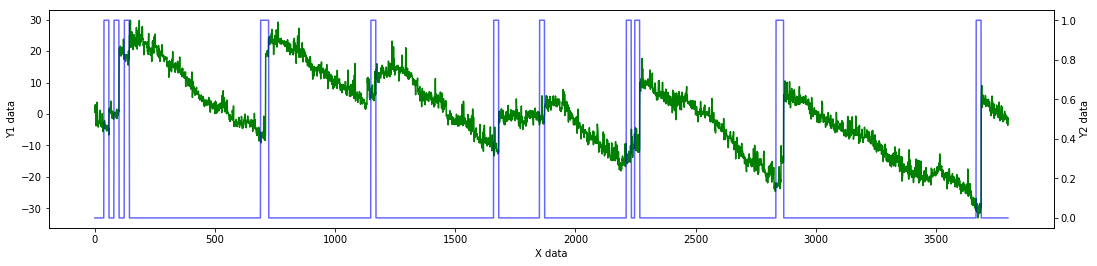

In [10]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot( df['x'], 'g-')
ax2.plot( df['y'], 'b-',alpha=0.6)

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data')
ax2.set_ylabel('Y2 data')

plt.show()

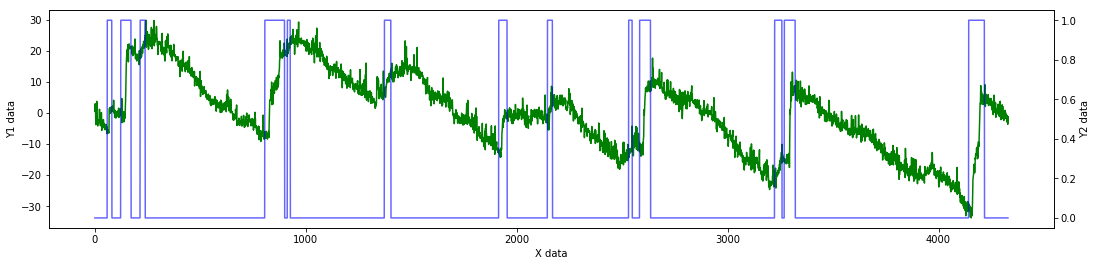

In [11]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(dataset['x'], 'g-')
ax2.plot(dataset['y'], 'b-',alpha=0.6)

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data')
ax2.set_ylabel('Y2 data')

plt.show()

## Saving the input file

In [12]:
df.columns = ['x','n','u','Events']
df.head()

,x,n,u,Events
0,-12.28,-92.30,-9.23,0.0
1,-12.58,-92.54,-11.31,0.0
2,-13.16,-92.24,-8.02,0.0
3,-13.21,-92.20,-11.51,0.0
4,-12.92,-93.19,-10.20,0.0


In [13]:
# df.to_csv('/home/francovm/Projects/SSE/data/processed/input_data_shifted_40.csv', sep='\t', encoding='utf-8')